In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report

In [20]:
data = pd.read_csv("input.csv")
data

,genre,song,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Hip Hop/Rap,Verse One:\n\nAlright I might\nHave had a litt...,NaN,105.0,Hip Hop/Rap
1,Rock,Adam Ant/Marco Pirroni\nEvery girl is a someth...,NaN,533.0,Rock
2,Rock,"I've just erased it's been a while, I've got a...",NaN,79.0,Country
3,R&B,Little darling \nWhere you've been so long \nI...,NaN,40.0,Electronic
4,Rock,"Lead Vocal by Greg\n\nWell, these late night c...",NaN,85.0,Pop
...,...,...,...,...,...
890,Rock,Born from some mother's womb\nJust like any ot...,NaN,NaN,NaN
891,Rock,"This wanting more from me is tearing me, it's ...",NaN,NaN,NaN
892,Pop,"Hello, it's me\nI was wondering if after all t...",NaN,NaN,NaN
893,Pop,"Oooh, oooh, oooh, oooh\n\nShe, she ain't real\...",NaN,NaN,NaN


In [14]:
train = data.loc[:,["genre", "song"]]
train

,genre,song
0,Hip Hop/Rap,Verse One:\n\nAlright I might\nHave had a litt...
1,Rock,Adam Ant/Marco Pirroni\nEvery girl is a someth...
2,Rock,"I've just erased it's been a while, I've got a..."
3,R&B,Little darling \nWhere you've been so long \nI...
4,Rock,"Lead Vocal by Greg\n\nWell, these late night c..."
...,...,...
890,Rock,Born from some mother's womb\nJust like any ot...
891,Rock,"This wanting more from me is tearing me, it's ..."
892,Pop,"Hello, it's me\nI was wondering if after all t..."
893,Pop,"Oooh, oooh, oooh, oooh\n\nShe, she ain't real\..."


In [17]:
test = pd.read_csv("input.csv")
test = test.loc[:,["genre", "song"]]
test

,genre,song
0,Hip Hop/Rap,Verse One:\n\nAlright I might\nHave had a litt...
1,Rock,Adam Ant/Marco Pirroni\nEvery girl is a someth...
2,Rock,"I've just erased it's been a while, I've got a..."
3,R&B,Little darling \nWhere you've been so long \nI...
4,Rock,"Lead Vocal by Greg\n\nWell, these late night c..."
...,...,...
890,Rock,Born from some mother's womb\nJust like any ot...
891,Rock,"This wanting more from me is tearing me, it's ..."
892,Pop,"Hello, it's me\nI was wondering if after all t..."
893,Pop,"Oooh, oooh, oooh, oooh\n\nShe, she ain't real\..."


In [22]:
#Check for missing values
train.isnull().sum()

genre    0
song     0
dtype: int64

In [26]:
#Converting Description from Object to String
train['song'] = train['song'].astype(str)

In [27]:
#Spliting Text to words
print(train['song'].apply(lambda x: len(x.split(' '))).sum())

191011


In [28]:
#Removing Null (NAN) Values if any
train.dropna(subset=['song'], inplace=True)

In [29]:
#Added a length column -> length of song lyrics
train['length'] = train['song'].apply(len)
train.head()

,genre,song,length
0,Hip Hop/Rap,Verse One:\n\nAlright I might\nHave had a litt...,2181
1,Rock,Adam Ant/Marco Pirroni\nEvery girl is a someth...,713
2,Rock,"I've just erased it's been a while, I've got a...",600
3,R&B,Little darling \nWhere you've been so long \nI...,977
4,Rock,"Lead Vocal by Greg\n\nWell, these late night c...",1130


In [46]:
train.genre.value_counts()

Rock           533
Hip Hop/Rap    105
Pop             85
Country         79
R&B             53
Electronic      40
Name: genre, dtype: int64

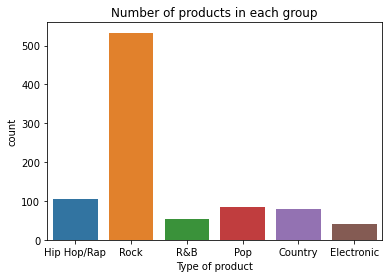

In [43]:
sns.countplot(x='genre',data=train)
plt.xlabel('Type of product')
plt.title('Number of products in each group');

In [39]:
#Text Pre rocessing
nltk.download('stopwords')
stop = stopwords.words('english')
print(stop[::10])

porter = nltk.stem.PorterStemmer()

['i', "you've", 'himself', 'they', 'that', 'been', 'a', 'while', 'through', 'in', 'here', 'few', 'own', 'just', 're', 'doesn', 'ma', "shouldn't"]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aymane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
def remove_punctuation(description):
    """The function to remove punctuation"""
    table = str.maketrans('', '', string.punctuation)
    return description.translate(table)

def remove_stopwords(text):
    """The function to removing stopwords"""
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

def stemmer(stem_text):
    """The function to apply stemming"""
    stem_text = [porter.stem(word) for word in stem_text.split()]
    return " ".join(stem_text)

In [41]:
train['song'] = train['song'].apply(remove_punctuation)
train['song'] = train['song'].apply(remove_stopwords)
train['song'] = train['song'].apply(stemmer)

In [42]:
train.head()

,genre,song,length
0,Hip Hop/Rap,vers one alright might littl glare stare ya ho...,2181
1,Rock,adam antmarco pirroni everi girl someth girl e...,713
2,Rock,ive eras ive got world sale walk away better d...,600
3,R&B,littl darl youv long ive think ya feel real st...,977
4,Rock,lead vocal greg well late night convers leav s...,1130


In [63]:
import nltk

In [47]:
vectorizer = CountVectorizer()
vectorizer.fit(train['song'])
vector = vectorizer.transform(train['song'])
print(vector.shape)
print(vector.toarray())

(895, 8869)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


analyzer = CountVectorizer().build_analyzer()
vectorizer = CountVectorizer(analyzer=stemmed_words,
                             tokenizer=nltk.tokenize.TreebankWordTokenizer(),
                             lowercase=True,
                             preprocessor=None,
                             max_features=5000
                             )

In [48]:
# extract the tfid representation matrix of the text data
tfidf_converter = TfidfTransformer()
X_tfidf = tfidf_converter.fit_transform(vector).toarray()
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
X = train['song']
y = train['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((671,), (224,), (671,), (224,))

In [50]:
#Logistic Regression
model_log = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                      ('tfidf', TfidfTransformer()),
                      ('model',LogisticRegression()),
                     ])

model_log.fit(X_train, y_train)

ytest = np.array(y_test)
pred = model_log.predict(X_test)

In [51]:
print('accuracy %s' % accuracy_score(pred, y_test))
print(classification_report(ytest, pred))

accuracy 0.6383928571428571
              precision    recall  f1-score   support

     Country       0.00      0.00      0.00        27
  Electronic       0.00      0.00      0.00        11
 Hip Hop/Rap       1.00      0.55      0.71        29
         Pop       0.00      0.00      0.00        15
         R&B       0.00      0.00      0.00        15
        Rock       0.61      1.00      0.76       127

    accuracy                           0.64       224
   macro avg       0.27      0.26      0.24       224
weighted avg       0.48      0.64      0.52       224



C:\Users\Aymane\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aymane\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aymane\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
#Naive Bayes
nbc = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
               ('tfidf', TfidfTransformer()),
               ('model',MultinomialNB()),
               ])

nbc.fit(X_train, y_train)

ytest = np.array(y_test)
pred_y = nbc.predict(X_test)

In [53]:
print('accuracy %s' % accuracy_score(pred_y, y_test))
print(classification_report(ytest, pred_y))

accuracy 0.6116071428571429
              precision    recall  f1-score   support

     Country       0.00      0.00      0.00        27
  Electronic       0.00      0.00      0.00        11
 Hip Hop/Rap       1.00      0.34      0.51        29
         Pop       0.00      0.00      0.00        15
         R&B       0.00      0.00      0.00        15
        Rock       0.59      1.00      0.74       127

    accuracy                           0.61       224
   macro avg       0.27      0.22      0.21       224
weighted avg       0.47      0.61      0.49       224



C:\Users\Aymane\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aymane\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aymane\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NB_model.score()

In [58]:
#SVM - Support Vector Machine
nbc = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
               ('tfidf', TfidfTransformer()),
               ('model',LinearSVC()),
               ])

nbc.fit(X_train, y_train)

ytest = np.array(y_test)
pred_y = nbc.predict(X_test)

In [59]:
print('accuracy %s' % accuracy_score(pred_y, y_test))
print(classification_report(ytest, pred_y))

accuracy 0.6160714285714286
              precision    recall  f1-score   support

     Country       0.17      0.04      0.06        27
  Electronic       0.00      0.00      0.00        11
 Hip Hop/Rap       0.90      0.66      0.76        29
         Pop       0.00      0.00      0.00        15
         R&B       0.40      0.13      0.20        15
        Rock       0.64      0.91      0.75       127

    accuracy                           0.62       224
   macro avg       0.35      0.29      0.30       224
weighted avg       0.53      0.62      0.54       224



C:\Users\Aymane\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aymane\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aymane\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
#Random Forest
rf = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
               ('tfidf', TfidfTransformer()),
               ('rf', RandomForestClassifier(n_estimators=50)),
               ])

rf.fit(X_train, y_train)

ytest = np.array(y_test)
preds = rf.predict(X_test)

In [57]:
print('accuracy %s' % accuracy_score(preds, y_test))
print(classification_report(ytest, preds))

accuracy 0.65625
              precision    recall  f1-score   support

     Country       1.00      0.04      0.07        27
  Electronic       0.00      0.00      0.00        11
 Hip Hop/Rap       1.00      0.62      0.77        29
         Pop       0.00      0.00      0.00        15
         R&B       1.00      0.07      0.12        15
        Rock       0.62      1.00      0.77       127

    accuracy                           0.66       224
   macro avg       0.60      0.29      0.29       224
weighted avg       0.67      0.66      0.55       224



C:\Users\Aymane\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aymane\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aymane\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
#best model
log_acc = accuracy_score(pred, y_test)
svm_acc = accuracy_score(pred_y, y_test)
rf_acc = accuracy_score(preds, y_test)
nb_acc = accuracy_score(pred_y, y_test)


In [61]:
models = pd.DataFrame({
                      'Model': ['Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest'],
                      'Score': [log_acc, svm_acc, nb_acc, rf_acc,]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.656250
0,Logistic Regression,0.638393
1,SVM,0.616071
2,Naive Bayes,0.616071


In [ ]:
 mn  